# Part I - Ford GoBike-trip  data

## By ASSINE Géraud


## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#univ">Univariate Exploration</a></li>
    <li><a href="#biv">Bivariate Exploration</a></li>
    <li><a href="#multiv">Multivariate Exploration</a></li>
    <li><a href="#conclu">Conclusion</a></li>
</ul>



<a id="intro"></a>
## Introduction


## Preliminary Wrangling

Dans ce document il est question d'explorer le jeu de données du système Ford GoBike. En effet, ce dernier fournit des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.

Le but de l'analyse consiste à trouver des corrélations ou liaisons entre les variables. Plus précisément, celles qui ont un impact sur la variable **duration(S)**.
De ce fait, nous utiliserons trois outils que sont:
 - Analyse univariée;
 - Analyse bivariée;
 - Analyse multivariée
 
 Dans notre analyse nous aurons à répondre un certain nombre de questions ci-dessous, en appliquant ces trois outils cités précédemment. 


## Questions

### 1. What is the structure of your dataset?
### 2. What is/are the main feature(s) of interest in your dataset?
### 3. What features in the dataset do you think will help support your investigation into your feature(s) of interest?
### 4. Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
### 5. Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
### 6. Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
### 7. Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
### 8.Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
### 9. Were there any interesting or surprising interactions between features?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load dataset
bike_trip_data= pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
#large overview of dataset
print(bike_trip_data.shape)
print('\n')
print(bike_trip_data.dtypes)
print('\n')
print(bike_trip_data.head(10))

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 

In [4]:
#Information sur le jeu de données
bike_trip_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- D'après les informations affichées sur le jeu de données nous avons des données manquantes sur les variables suivantes: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender.

*********************************************************


- les variables: start_time et end_time doivent être en datetime.



In [5]:
bike_trip_data.duplicated().sum()

0

On a pas de lignes dupliquées dans ce dataset.

In [6]:
#descriptive statistics for numeric variables
bike_trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
bike_trip_data['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
bike_trip_data[bike_trip_data['duration_sec'] == 85444]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


Dans ce tableau de résumé des données on voit que la durée la plus longue est de **85444 S**.

### 1. What is the structure of your dataset?

> Il y a **183412 trajets enregistrés**, et **16 variables** (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude,
       start_station_longitude, end_station_id, end_station_name,
       end_station_latitude, end_station_longitude, bike_id, user_type,
       member_birth_year, member_gender, bike_share_for_all_trip).
La plus part des variables sont quantitatives sauf pour member_gender, bike_share_for_all_trip, user_type, start_station_name, end_station_name qui sont des variables qualitatives nominales et start_time /end_time qui sont des dates.

### 2. What is/are the main feature(s) of interest in your dataset?

> Ce qui nous intéresse le plus avec ce jeu de données est de savoir quelles variables peuvent avoir un impact sur la durée moyenne du trajet. 

### 3. What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Les variables comme member_gender et member_birth_year ont sûrement un grand impact sur la durée moyenne du trajet. Et la variable user_type aura moins d'impact.

<a id="univ"></a>
## Univariate Exploration

> Dans cette partie, nous allons faire une investigation sur les différentes distributions pour chaque variable.

In [9]:
#nettoyage du dataset
bike_trip_data_copy = bike_trip_data.copy()

In [10]:
#Convertir les variables date en datetime
#Codes
bike_trip_data_copy['start_time'] = pd.to_datetime(bike_trip_data_copy['start_time'])
bike_trip_data_copy['end_time'] = pd.to_datetime(bike_trip_data_copy['end_time'])

In [11]:
#Suppression des NaN
##Code
bike_trip_data_copy.dropna(subset = ['start_station_id', 'start_station_name', 
    'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender' ], 
    axis = 0, inplace = True)

In [12]:
#Convertir la variable member_birth_year
bike_trip_data_copy['member_birth_year'] = bike_trip_data_copy['member_birth_year'].apply(int)

In [13]:
#Test
bike_trip_data_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [14]:
##Test
bike_trip_data_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
bike_trip_data_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
160776,216,2019-02-05 16:39:45.606,2019-02-05 16:43:22.200,84.0,Duboce Park,37.769200,-122.433812,119.0,18th St at Noe St,37.761047,-122.432642,5497,Subscriber,1973,Male,No
4546,567,2019-02-28 15:37:34.670,2019-02-28 15:47:02.515,265.0,Ninth St at Parker St,37.858868,-122.291209,242.0,Milvia St at Derby St,37.860125,-122.269384,328,Customer,1963,Male,No
112701,714,2019-02-12 14:28:59.761,2019-02-12 14:40:54.512,310.0,San Fernando St at 4th St,37.335885,-121.885660,296.0,5th St at Virginia St,37.325998,-121.877120,145,Subscriber,1994,Female,Yes
50490,1810,2019-02-21 18:43:28.251,2019-02-21 19:13:38.883,27.0,Beale St at Harrison St,37.788059,-122.391865,142.0,Guerrero Park,37.745739,-122.422140,6544,Subscriber,1992,Male,No
171767,1308,2019-02-03 18:46:32.186,2019-02-03 19:08:20.849,350.0,8th St at Brannan St,37.771431,-122.405787,146.0,30th St at San Jose Ave,37.742314,-122.423181,4637,Subscriber,1994,Female,No
49783,390,2019-02-21 20:31:50.774,2019-02-21 20:38:21.365,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,49.0,S Park St at 3rd St,37.780760,-122.394989,5826,Customer,1993,Male,No
89740,163,2019-02-16 14:51:01.362,2019-02-16 14:53:44.843,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2039,Subscriber,1988,Male,No
10901,768,2019-02-27 19:20:05.908,2019-02-27 19:32:54.744,105.0,16th St at Prosper St,37.764285,-122.431804,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4795,Subscriber,1966,Male,No
88575,212,2019-02-16 18:02:36.270,2019-02-16 18:06:08.423,112.0,Harrison St at 17th St,37.763847,-122.413004,125.0,20th St at Bryant St,37.759200,-122.409851,2682,Subscriber,1991,Female,No
32255,575,2019-02-24 14:47:44.872,2019-02-24 14:57:20.460,306.0,Saint James Park,37.339301,-121.889937,298.0,Oak St at 1st St,37.322125,-121.881090,4009,Subscriber,1993,Male,Yes


In [16]:
bike_trip_data_copy.min()

duration_sec                                       61
start_time                 2019-02-01 00:00:20.636000
end_time                   2019-02-01 00:04:52.058000
start_station_id                                  3.0
start_station_name              10th Ave at E 15th St
start_station_latitude                      37.317298
start_station_longitude                   -122.453704
end_station_id                                    3.0
end_station_name                10th Ave at E 15th St
end_station_latitude                        37.317298
end_station_longitude                     -122.453704
bike_id                                            11
user_type                                    Customer
member_birth_year                                1878
member_gender                                  Female
bike_share_for_all_trip                            No
dtype: object

In [17]:
print(bike_trip_data_copy.shape)

(174952, 16)


Notre dataset est maintenant constitué de **174952 linges**.

In [18]:
bike_trip_data_copy['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

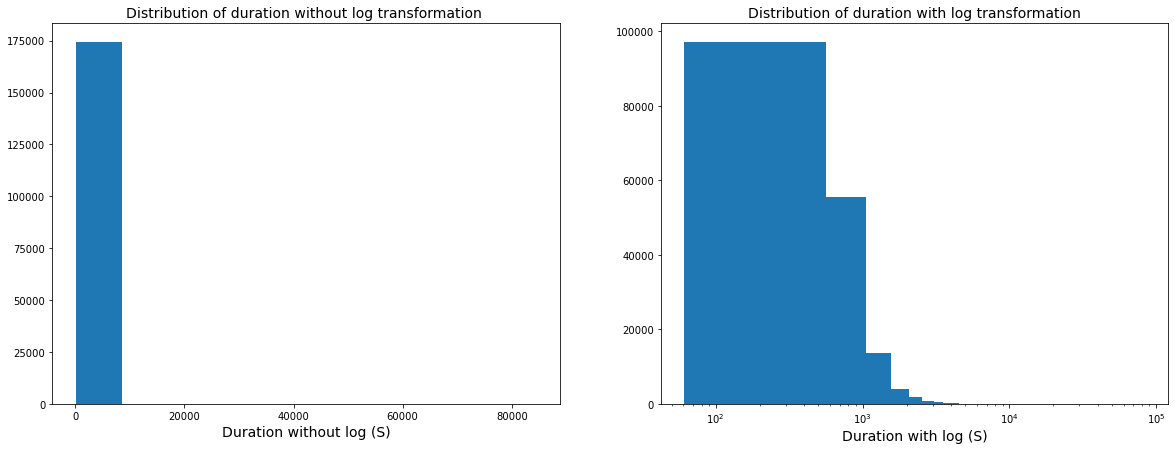

In [19]:
plt.figure(figsize = [20, 7])

# histogramme à gauche
plt.subplot(1,2,1)
plt.hist(data = bike_trip_data_copy, x = 'duration_sec');
plt.title("Distribution of duration without log transformation ", fontsize =14)
plt.xlabel('Duration without log (S)', fontsize = 14);


#histogramme à droite
plt.subplot(1, 2, 2)
bins = np.arange(61, bike_trip_data_copy['duration_sec'].max()+500, 500);
plt.hist(data = bike_trip_data_copy, x = "duration_sec", bins = bins);
plt.title("Distribution of duration with log transformation", fontsize = 14)
plt.xscale('log');
plt.xlabel('Duration with log (S)', fontsize = 14);

plt.show()

Dans la visualisation de la variable duration_sec avec la représentation "log" que l'on a des valeurs trop grandes. Et on constate que la largeur des bandes se différencie d'un niveau à l'autre. La distribution présente une asymétrie à gauche.

On va voir avec la variable member_birth_year

In [20]:
bike_trip_data_copy['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

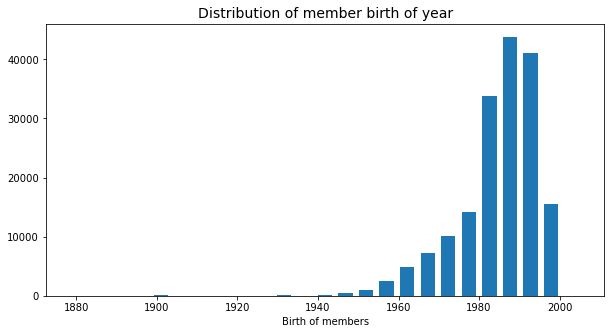

In [21]:
#Distribution de la variable member_birth_year
plt.figure(figsize = [10, 5])


bins = np.arange(1878, bike_trip_data_copy['member_birth_year'].max()+5.1, 5.1);
plt.hist(data = bike_trip_data_copy, x = 'member_birth_year', bins = bins, rwidth = .7);
plt.title("Distribution of member birth of year", fontsize = 14)
plt.xlabel('Birth of members', fontsize = 10);


Pour cette variable on constate des années qui sont très loin si l'on sait que ce type de sport demande une certaine endurance donc les personnes très agées ne pourront la pratiquer donc les membres qui sont nés avant 1940 sont considérées commes des outliers. En plus la distribution est asymétrique à droite.

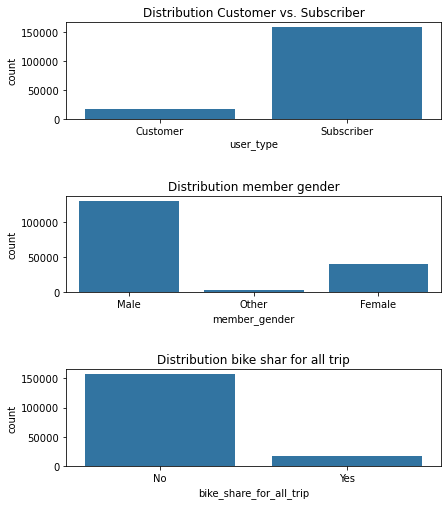

In [22]:
#Distribution des 3 variables qualitatives user_type, memeber_gender, bike_share_for_all_trip
fig, ax = plt.subplots(nrows = 3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_trip_data_copy, x= 'user_type', color = default_color,
             ax = ax[0]).set(title = "Distribution Customer vs. Subscriber");
sb.countplot(data = bike_trip_data_copy, x = 'member_gender', color = default_color,
             ax = ax[1]).set(title="Distribution member gender");
sb.countplot(data = bike_trip_data_copy, x = 'bike_share_for_all_trip', color = default_color,
             ax = ax[2]).set(title = "Distribution bike shar for all trip");
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 0.7, top = 0.87, wspace = 0.3, hspace = 0.8)

La visualisation des 3 variables qualitatives semble normale, on a: 
- d'abord, les subscriber qui sont beaucoup plus nombreux que les customer. 
- ensuite, le sexe des membres c'est les hommes qui sont plus nombreux.
- en fin, pour les vélos en libre service pour les déplacements peu sont disponibles.

In [23]:
np.log10(bike_trip_data_copy["duration_sec"]).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

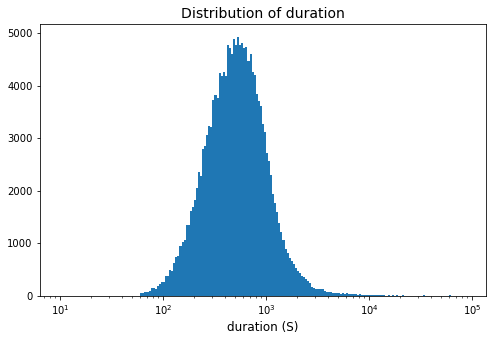

In [24]:
log_binsize = 0.02
bins = 10 ** np.arange(1, np.log10(bike_trip_data_copy['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trip_data_copy, x = 'duration_sec', bins = bins)
plt.title("Distribution of duration", fontsize = 14)
plt.xlabel("duration (S)", fontsize = 12);
plt.xscale('log')

Avec la transformation en log10, on voit que le graphe est unimodal et aussi presque symétrique même si l'on a des valeurs extrèmes à droite. On va considérer que les valeurs supérieures à 10K (S) sont des outliers. Donc il va falloir les supprimer.

In [25]:
bike_trip_data_copy[bike_trip_data_copy['duration_sec'] >10000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
199,15123,2019-02-28 18:23:19.035,2019-02-28 22:35:22.294,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,368.0,Myrtle St at Polk St,37.785434,-122.419622,5380,Subscriber,1980,Male,No
297,13061,2019-02-28 18:28:18.728,2019-02-28 22:05:59.954,19.0,Post St at Kearny St,37.788975,-122.403452,19.0,Post St at Kearny St,37.788975,-122.403452,5830,Subscriber,1987,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178416,31203,2019-02-01 08:40:28.487,2019-02-01 17:20:31.553,78.0,Folsom St at 9th St,37.773717,-122.411647,11.0,Davis St at Jackson St,37.797280,-122.398436,5110,Subscriber,1989,Male,No
178649,14321,2019-02-01 12:50:10.691,2019-02-01 16:48:51.797,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,4642,Customer,1977,Other,No
178656,12894,2019-02-01 13:13:12.725,2019-02-01 16:48:07.003,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5105,Subscriber,1996,Other,Yes
179732,10568,2019-02-01 10:08:37.189,2019-02-01 13:04:45.198,364.0,China Basin St at 3rd St,37.772000,-122.389970,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,5561,Subscriber,1989,Male,No


On compte alors 358 lignes

In [26]:
bike_trip_data_copy[bike_trip_data_copy['member_birth_year'] <1940]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931,Male,No
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84.0,Duboce Park,37.769200,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931,Male,No
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84.0,Duboce Park,37.769200,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931,Male,No
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902,Female,No
177955,377,2019-02-01 18:23:33.411,2019-02-01 18:29:50.795,26.0,1st St at Folsom St,37.787290,-122.394380,321.0,5th St at Folsom,37.780146,-122.403071,5444,Subscriber,1933,Female,Yes
179280,355,2019-02-01 14:32:42.247,2019-02-01 14:38:37.896,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,1815,Subscriber,1938,Male,No
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901,Male,No


On compte alors 203 lignes 

In [27]:
#Suppression des outliers pour les variables duration_sec, member_birth_year
bike_trip_data_copy.drop(bike_trip_data_copy[bike_trip_data_copy['duration_sec'] >10000].index, inplace = True)
bike_trip_data_copy.drop(bike_trip_data_copy[bike_trip_data_copy['member_birth_year'] <1940].index,inplace = True)

In [28]:
##test
bike_trip_data_copy[bike_trip_data_copy['member_birth_year'] <1940]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


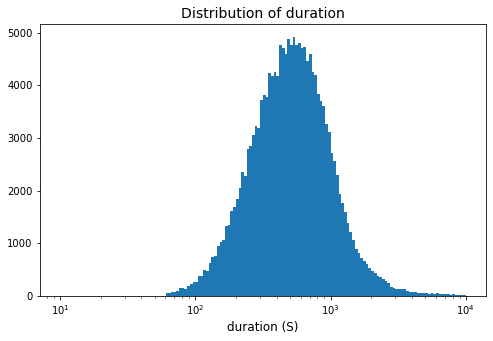

In [29]:
#revisualisation de la distribution de la variable duration_sec
log_binsize = 0.02
bins = 10 ** np.arange(1, np.log10(bike_trip_data_copy['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trip_data_copy, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.title('Distribution of duration', fontsize = 14);
plt.xlabel("duration (S)", fontsize = 12);


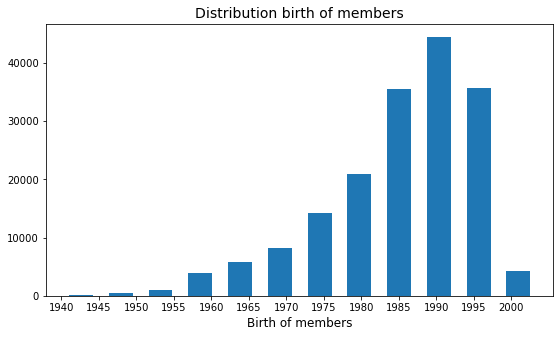

In [30]:
# revisualisation de la distribution de la variable member_birth_year
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
bins = np.arange(1940, bike_trip_data_copy['member_birth_year'].max()+5.3, 5.3);
plt.hist(data = bike_trip_data_copy, x = 'member_birth_year', bins = bins, rwidth = .6);
plt.xticks(np.arange(1940, 2000+5,5));
plt.xlabel('Birth of members', fontsize = 12);
plt.title("Distribution birth of members",fontsize = 14);


### 4. Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - La variable duration_sec prend de grandes valeurs en son sein. Ce qui m'a poussé à appliquer une transformation log. Après la tranformation j'ai constaté que la distribution est unimodale mais également presque symétrique.
> - La variable member_birth_year est discrète, présente des années lointaines par rapport aux autres.

### 5. Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Après investigation nous avons constaté que la variable duration_sec présente des outliers vers la droite. Mais également avec la variable member_birth_year, vue qu'il s'agit d'une course à vélo on peut considérer que les personnes très agées (nées avant 1940 par exemple) ne pourront pas pratiquer une telle activité c'est pourquoi ces années sont pris pour des outliers. Et que tous ces outliers ont été supprimés de notre dataset. 

<a id="biv"></a>
## Bivariate Exploration

> Pour cette partie de l'analyse bivariée, nous allons chercher les relations qui existent deux à deux entre les différentes variables.

In [31]:
numeric_vars = ['duration_sec','member_birth_year']
categoric_vars = ['user_type','member_gender', 'bike_share_for_all_trip']

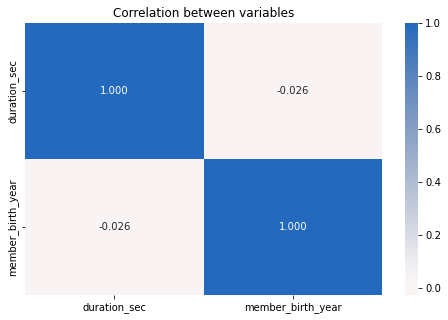

In [32]:
plt.figure(figsize =[8,5])
sb.heatmap(bike_trip_data_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0).set(title = "Correlation between variables")

plt.show()

Selon le graphe de corrélation, ces deux variables ont une très faible corrélation négative, soit **-0.026**.

bike_trip_data_copy.shape: (174391, 16)
bike_trip_samp.shape: (800, 16)


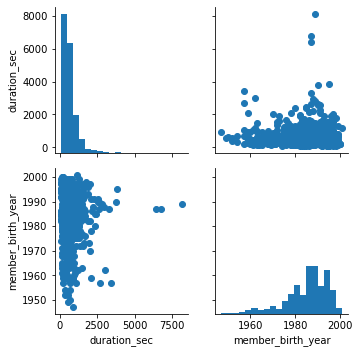

In [33]:
print('bike_trip_data_copy.shape:', bike_trip_data_copy.shape )
bike_trip_samp = bike_trip_data_copy.sample(n = 800, replace = False)
print('bike_trip_samp.shape:', bike_trip_samp.shape)

h = sb.PairGrid(data = bike_trip_samp, vars = numeric_vars);
h = h.map_diag(plt.hist, bins = 20);
h.map_offdiag(plt.scatter);

Pour la durée en (S), les personnes qui ont fait une plus longue course se trouvent entre les années 1980 à 2000.

<Figure size 720x720 with 0 Axes>

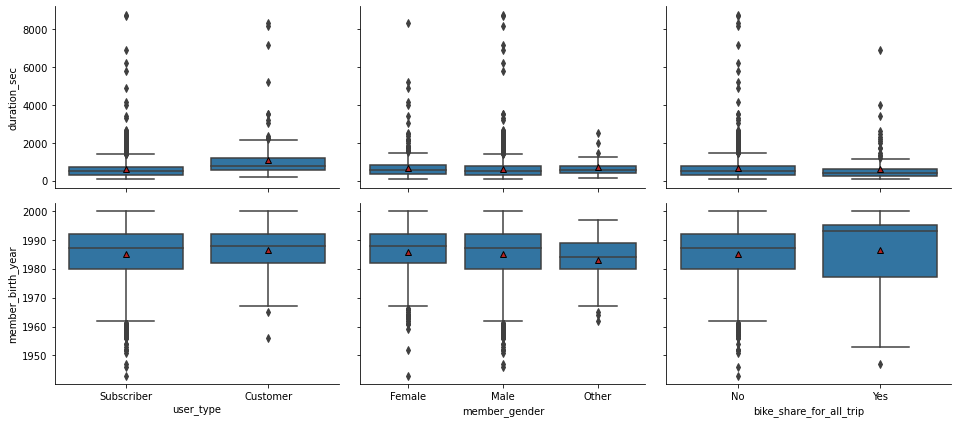

In [34]:
bike_trip_samp = bike_trip_data_copy.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    meanprops = {'markeredgecolor':'black', 'markerfacecolor':'firebrick'} 
    sb.boxplot(x=x, y=y, color=default_color, showmeans = True, meanprops = meanprops);

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = bike_trip_samp, y_vars = ['duration_sec', 'member_birth_year'], x_vars = categoric_vars,
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

> On voit que dans l'ensemble les trois variables qualitatives uer_type, member_gender, bike_share_for_all_trip on n'observe pas une différence significative de la moyenne (point rouge) de la durée (en S) au sein de ces groupes. 
> - Pour la variable user_type, en moyenne les Customer ont fait une plus longue durée.
> - Pour la variable member_gender, en moyenne ce sont les femmes qui ont fait la plus longue durée.
> - En fin pour la variable bike_share_for_all_trip en moyenne ceux qui ont pris des vélos en libre service pour faire leur course ont une plus longue durée.


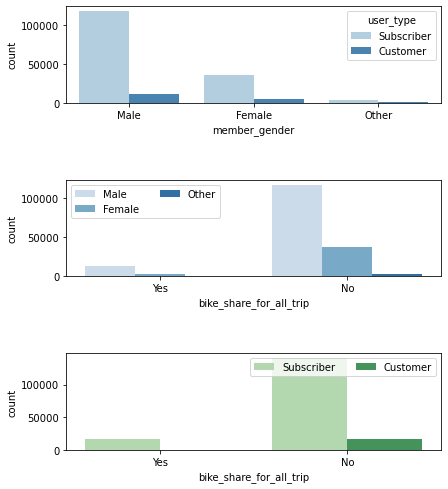

In [35]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = bike_trip_data_copy, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike_trip_data_copy, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike_trip_data_copy, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 0.7, top = 0.87, wspace = 0.3, hspace = 0.8)
plt.show()

- Les Subscriber sont plus performants vue le nombre de minutes faites. Et cela que ça soit chez les Hommes ou les Femmes.
- Ceux qui n'ont pas les vélos en libre service font plus de minutes dans la course.

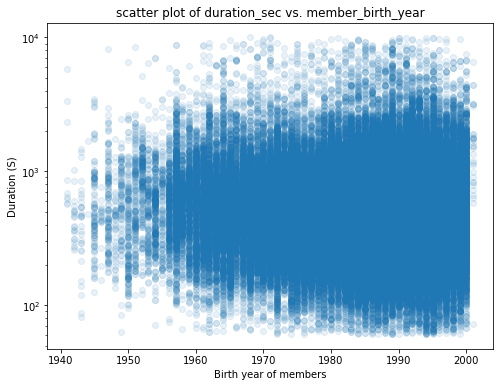

In [36]:
# scatter plot of duration_sec vs. member_birth_year, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = bike_trip_data_copy, x = 'member_birth_year', y = 'duration_sec', alpha = 1/10)
plt.xlabel('Birth year of members')
plt.yscale('log')
plt.ylabel('Duration (S)')
plt.title("scatter plot of duration_sec vs. member_birth_year")
plt.show()

In [37]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

bike_trip_data_copy['log_duration'] = bike_trip_data_copy['duration_sec'].apply(log_trans)

In [38]:
bike_trip_data_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'log_duration'],
      dtype='object')

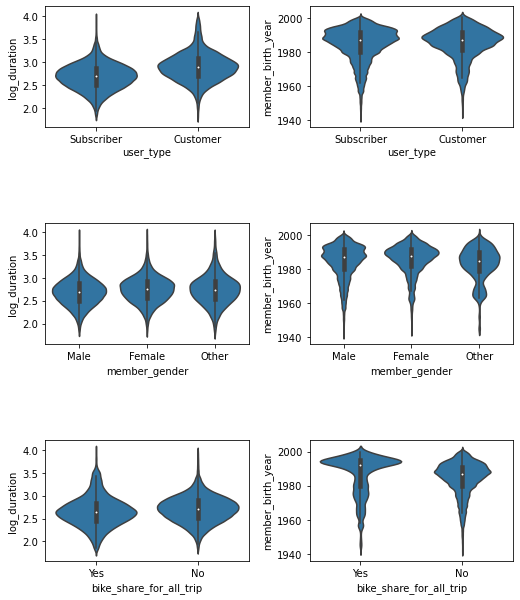

In [39]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = bike_trip_data_copy, x  = var, y = 'log_duration', ax = ax[i,0],
               color = default_color)
    
    sb.violinplot(data = bike_trip_data_copy, x = var, y = 'member_birth_year', ax = ax[i,1],
               color = default_color)
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 0.7, top = 0.87, wspace = 0.3, hspace = 0.8)
plt.show()

> - Avec ces projections on voit que les participants à la course sont plus représentés entre les années **1980 et 2000**. La distribution est plus dense dans cet intervalle d'années.
> - Et que les Users_type, member_gender, bike_share_for_all_trip sont tous compris entre les durées logarithmiques de **2.5 à 3**.

### 6. Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Avec les visualisation que nous avons pu faire, nous avons decouvert que les personnes les plus jeunes font de plus longues durées. Et que les type d'utilisateurs Subscriber sont plus endurant également parce qu'ils font de plus longues durées sur la course.
Autre constat est que les vélos en libre service ne permettent pas de faire de longues durées dans la course. 

### 7. Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> En regardant bien toutes les autres graphes précédentes, les quatre variables (duration_sec, member_gender, user_type, bike_share_for_all_trip) sont en intéraction.

<a id="multiv"></a>
## Multivariate Exploration

> Dans cette partie d'exploration multivariée, nous allons mettre en intéraction toutes les quatres variables évoquées précédemment (duration_sec, member_gender, user_type, bike_share_for_all_trip).

In [40]:
bike_trip_data_copy['member_birth_year'].min()

1941

Text(0.5, 1.0, 'Scatter plot of member_birth_year vs. duration_sec depending the user_type')

<Figure size 720x576 with 0 Axes>

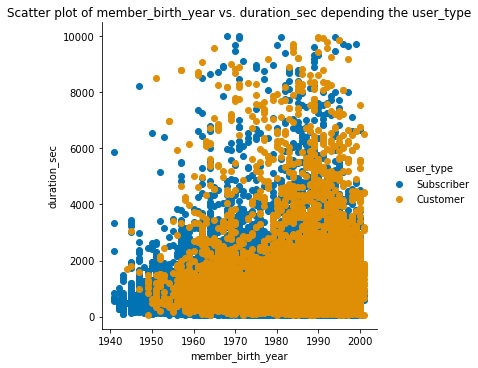

In [41]:
plt.figure(figsize = [10,8])
g = sb.FacetGrid(data = bike_trip_data_copy, hue = 'user_type', size = 5,
palette = 'colorblind')
g.map(plt.scatter, 'member_birth_year', 'duration_sec');
g.add_legend();
plt.title("Scatter plot of member_birth_year vs. duration_sec depending the user_type")

Sur ce graphe on voit que les subscriber paraissent les plus nombreux même si l'on voit une couche des customers dessus.

In [88]:
def point_plot_1(df,cat1, num, cat2,titre, lab):
    plt.figure(figsize = [10,8])
    sb.pointplot(data = df, x = cat1, y = num, hue = cat2,
           palette = 'Blues', linestyles = '', dodge = 0.4)
    plt.title(titre, fontsize = 14)
    plt.ylabel(lab)
    plt.show();
    

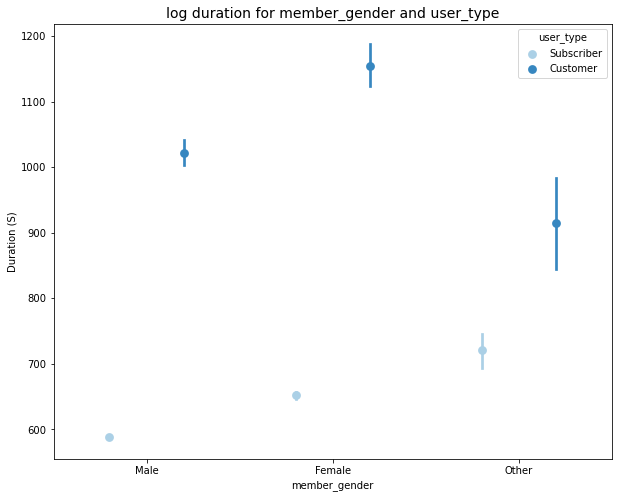

In [89]:
point_plot_1(bike_trip_data_copy, bike_trip_data_copy.member_gender,bike_trip_data_copy.duration_sec,
           bike_trip_data_copy.user_type,"log duration for member_gender and user_type","Duration (S)")

Avec la visualisation multivariée, on a une vue plus claire sur la représentation par sexe.
On constate que contrairement à ce que l'on avait vu sur les graphes précédents les Customer ont fait une plus longue durée dans la course que les Subscribers.  

In [86]:
select_data = bike_trip_data_copy[(bike_trip_data_copy['duration_sec'] >= 4000) & (bike_trip_data_copy['duration_sec'] <= 8000)]

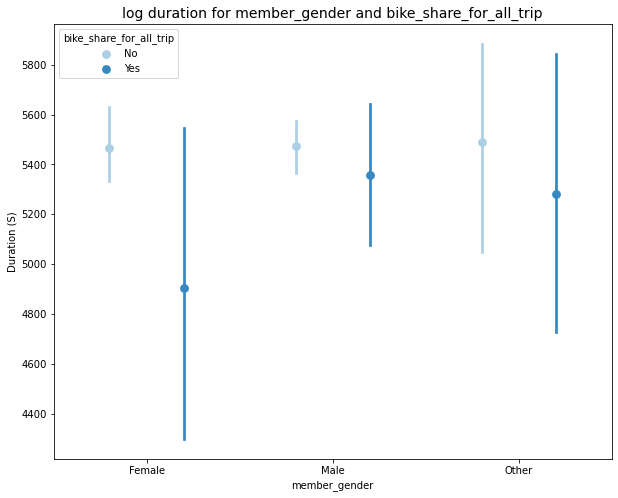

In [90]:
point_plot_1(select_data, select_data.member_gender,select_data.duration_sec,
           select_data.bike_share_for_all_trip,"log duration for member_gender and bike_share_for_all_trip","Duration (S)")

Toutefois, sur cette représentation cela vient confirmer le constat fait précédemment avec la variable bike_share_for_all_trip, c'est à dire ceux qui ont participé à la course sans les vélos en libre service ont une plus longue durée.

In [94]:
#Extraire les durées 
low_duration = bike_trip_data_copy[(bike_trip_data_copy['duration_sec'] <= 2000) & (bike_trip_data_copy['duration_sec'] <= 4000)]
high_duration = bike_trip_data_copy[(bike_trip_data_copy['duration_sec'] > 4000) & (bike_trip_data_copy['duration_sec'] <= 10000)]

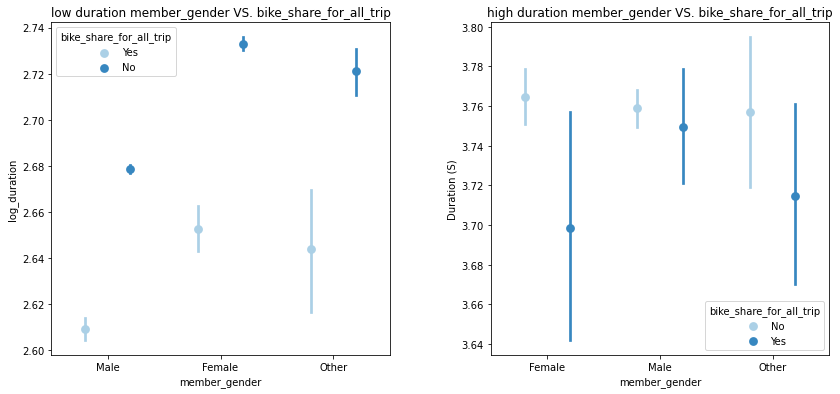

In [102]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = low_duration, x = 'member_gender', y = 'log_duration', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0]).set(title = "low duration member_gender VS. bike_share_for_all_trip")


sb.pointplot(data = high_duration, x = 'member_gender', y = 'log_duration', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1]).set(title = "high duration member_gender VS. bike_share_for_all_trip")
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 0.95, top = 0.87, wspace = 0.3, hspace = 0.8)
plt.ylabel('Duration (S)')
plt.show();

En faisant une investigation plus approfondie sur la variable bike_share_for_all_trip, c'est à dire en séparant les données en deux groupes l'une qui contient les données dont la durée est inférieur ou égale 4000 et l'autre qui concerne celles d'entre 4000 et 10000. Et je me suis rendu compte qu'en réalité, les personnes qui ont les vélos en libre service ont permis de faire plus de temps avec les données dont la durée est inférieur à 4000 (S). Et pour les données dont la durée est comprise entre 4000 et 10000 (S) c'est ceux qui ne possèdent pas les vélos en libre service qui ont pu faire plus de temps dans la course.

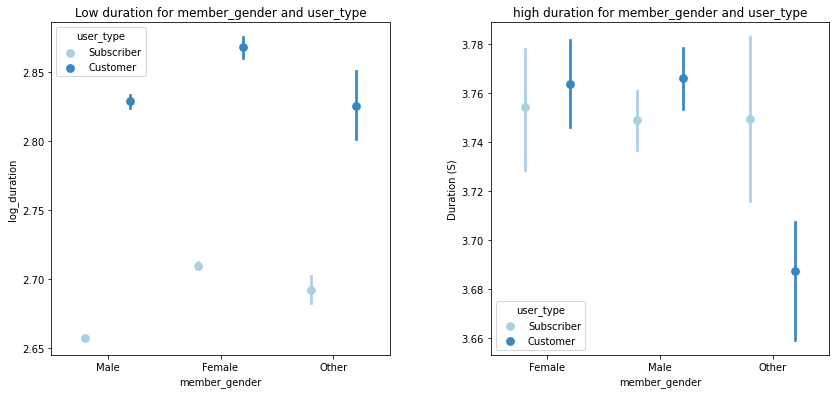

In [103]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = low_duration, x = 'member_gender', y = 'log_duration', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0]).set(title = "Low duration for member_gender and user_type");

sb.pointplot(data = high_duration, x = 'member_gender', y = 'log_duration', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1]).set(title = "high duration for member_gender and user_type")
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 0.95, top = 0.87, wspace = 0.3, hspace = 0.8)
plt.ylabel('Duration (S)')
plt.show();

Dans cette visualisation, multivariée nous constatons que les résultats obtenus précédemment, c'est à dire les Customer ont pu faire une plus longue durée que les Subscriber quelque soit le genre de la personne. C'est seulement dans la section qui contient les données comprise entre 4000 et 10000 (S) avec le genre other où l'on a les Customer qui ont la plus faible durée. 

### 8.Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Dans la visualisation multivariée nous avons constaté que les Customer sont ceux qui ont fait le plus de longue durée dans la course à vélo parmi les type d'utilisateurs.
> Que ceux qui n'ont pas accès aux vélos en libre service ont fait une plus longue durée dans la course.
### 9. Were there any interesting or surprising interactions between features?

> En répartissant le jeu de données en deux sous groupes (toutes les données dont la durée est inférieure ou égale 4000 et l'autre entre 4000 et 1OOOO) et on sait rendu compte que pour la première portion (<= 4000) les femmes qui sont des Customer ou qui n'ont pas utilisées les vélos en libre service ont pu faire une plus longue durée que les hommes.

<a id="conclu"></a>
## Conclusions
>Dans ce jeu de données, comme présenté ci-dessus nous avons principalement cinq variables dont 2 numériques une continue (duration_sec) et l'autre discrète (member_birth_year) et les trois autres qui sont toutes des variables qualitatives nominales. Nous avons pu faire de l'exploration de ces données avec les visualisations suivantes univariée, bivariée et multivariée.

> Et les découvertes intéressantes que nous avons pu faire d'abord dans:
> - l'analyse bivariée nous avons constaté que les variables année de naissance (member_birth_year), sexe des participants (member_gender), les vélos en libre service (bike_share_for_all_trip) et les user_type ont un impact sur la variable durée (duration_sec).
> - Dans l'analyse multivariée nous avons voulu aller en profondeur dans la fouille des informations en répartissant les données en deux groupes l'un qui contient les données dont la durée est inférieur à 4000 (S) et l'autre dont la durée est comprise entre 4000 et 10000 (S). 